<hr style="height:1px"> 

<div class='container2'>
		<div>
		<br>
		<br>
		<br>
			<img src="images\images.jpeg" align="left" style="width:10em; margin-right: 1em;">
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/2 | 24M34 | Lab 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Análise Exploratória de Dados </b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Projeto Naju - Previsão de churn (cancelamento) de clientes <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data"> </a> </h2>

Notebook desenvolvido por: <a href="https://github.com/Anajmr">Ana Júlia Monteiro Rocha</a>

 <hr style="height:2px"> 

## 1. Bibliotecas Necessárias 
    # Bibliotecas para manipulação e análise de dados
    pandas
    numpy

    # Bibliotecas para visualização de dados
    plotly

    # Bibliotecas para Machine Learning
    sklearn

Será utilizado o conjunto de dados que se encontra no diretório `cancelamentos`, em formato de arquivo `.csv`.

---
## 2. Carregar e Exibir os Dados da Fonte

Primeiro, vamos importar todas as bibliotecas que serão utilizadas no projeto.

In [ ]:
# Importações
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

print("Bibliotecas carregadas com sucesso!")


Bibliotecas carregadas com sucesso!


### Apresentação da base de dados

A base de dados será usada para prever o comportamento dos clientes. Você pode analisar todos os dados relevantes de cada e desenvolver programas focados em retenção de clientes. 
<br>
 <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data">(Telco Customer Churn)

In [101]:
# Carrega o arquivo CSV para a variável 'tabela'
tabela = pd.read_csv("C:\\LIA VSCODE\\PROJETO_1709\\cancelamentos.csv")

print("Dados importados com sucesso!")

# Exibe as 5 primeiras linhas para vermos a estrutura dos dados
display(tabela.head())

# Exibe informações sobre as colunas.
print("\nInformações Iniciais do DataFrame:")
tabela.info()

Dados importados com sucesso!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Informações Iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperl

---
## 3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados.


In [102]:
# Corrigir a coluna 'TotalCharges' para ser numérica.
tabela['TotalCharges'] = pd.to_numeric(tabela['TotalCharges'], errors='coerce')

print("Coluna corrigida!")


tabela.info()

Coluna corrigida!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

## 3.1 Eliminação de atributos irrelevantes

O objetivo do projeto é identificar a espécie de uma flor, que é a (`classe`). Não é preciso uma análise profunda para observar que os atributos `id_planta` e `cidade_origem` não contribuem para a identificação. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes. 

*Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.*

## O QUE CADA COLUNA FAZ? REMOVER OU NÃO?
`customerID` O código de identificação único de cada cliente. O ID de um cliente não ajuda a prever se outro cliente irá cancelar. É um dado irrelevante para o modelo.

`gender` Gênero do cliente (Masculino/Feminino). É uma informação demográfica. Pode ser que homens e mulheres tenham taxas de cancelamento diferentes. 

`SeniorCitizen`	Se o cliente é idoso (1 para sim, 0 para não). Clientes mais velhos podem ter necessidades e comportamentos diferentes dos mais jovens.

`Partner` Se o cliente tem um parceiro(a) ou é casado(a) (Sim/Não).	O estado civil pode influenciar a estabilidade e a necessidade dos serviços contratados.

`Dependents` Se o cliente tem dependentes (filhos, etc.) (Sim/Não). Assim como ter parceiro, a presença de dependentes pode indicar um perfil familiar com necessidades específicas de serviço.

`tenure` Tempo, em meses, que a pessoa é cliente da empresa. Clientes muito recentes podem cancelar por não se adaptarem, e clientes muito antigos podem sair por receberem ofertas melhores.

`PhoneService` Se o cliente tem serviço de telefone (Sim/Não). A presença (ou ausência) de serviços básicos pode influenciar sua satisfação.

`MultipleLines`	Se o cliente tem múltiplas linhas de telefone (Sim/Não). Complementa a informação do serviço de telefone.

`InternetService` O tipo de serviço de internet (DSL, Fibra Óptica, Não). O tipo e a qualidade do serviço de internet são frequentemente um grande motivo para o cliente ficar ou sair.

`OnlineSecurity e outras` Todas as colunas de serviços adicionais (Sim/Não). A quantidade e o tipo de serviços extras que um cliente contrata (segurança, backup, suporte técnico, etc.) são ótimos indicadores de seu engajamento com a empresa.

`Contract` O tipo de contrato do cliente (Mensal, Um ano, Dois anos). Clientes com contrato mensal têm muito mais liberdade para cancelar do que aqueles com contratos de longo prazo.

`PaperlessBilling` Se o cliente recebe a fatura online, sem papel (Sim/Não). Pode indicar o nível de afinidade do cliente com o meio digital.

`PaymentMethod`	O método de pagamento (Boleto, Cartão de Crédito, etc.). Métodos de pagamento podem estar associados ao perfil do cliente. Por exemplo, pagamento em débito automático pode indicar um cliente mais "estável".

`MonthlyCharges` O valor da mensalidade cobrada do cliente. O preço é um dos principais fatores na decisão de um cliente.

`TotalCharges` O valor total que o cliente já pagou para a empresa.	Esta coluna combina a informação da mensalidade e do tempo de contrato (tenure). É um bom indicador do valor do cliente para a empresa.

`Churn`	A coluna que indica se o cliente cancelou ou não (Sim/Não).	Esta é a coluna que queremos prever (ALVO). Ela não será usada para treinar o modelo como uma característica, mas sim como a resposta que ele deve aprender.


In [103]:
# Remover a coluna 'customerID' que não é relevante para o modelo.
tabela = tabela.drop(columns='customerID')

# imprimir o dataframe
display(tabela.head(n=10))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [104]:
print(tabela.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']



## 3.2 Tratamento de atributos com valores ausentes

Verificar se existem atributos com valores ausentes (NaN = Not a Number) na base de dados.

In [105]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(tabela).any(axis=1).to_numpy().nonzero()

# imprime apenas as linhas com valores ausentes
display(tabela.iloc[idxRowNan])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [106]:
# Remover as linhas que agora têm valores nulos (NaN).
tabela.dropna(inplace=True)

print("Dados limpos!")


Dados limpos!


## 3.3 Tratamento de dados inconsistentes ou redundantes

Verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há registros representados por atributos com todos os valores iguais, mas com diagnóstico diferentes. A redundância é dada pela repetição de linhas na base de dados.

In [107]:
# Identificar linhas que são completamente idênticas a outras.

print("Verificando a existência de objetos redundantes...")

df_duplicates = tabela[tabela.duplicated(keep=False)] 

if len(df_duplicates) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s) encontrado(s):')
    display(df_duplicates)
else:
    print('\nNão existem objetos redundantes e/ou inconsistentes!')

Verificando a existência de objetos redundantes...

Objeto(s) redundante(s) e/ou inconsistente(s) encontrado(s):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
646,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
976,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1243,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


Existem objetos redundantes (duplicados) e outros inconsistentes (iguais, exceto diagnóstico distintos). 

Primeiro, serão removidos os registros redundantes, mantendo na base apenas o primeiro deles.

In [108]:
def delDuplicatas(tabela_df):
    tabela_df = tabela_df.drop_duplicates(keep='first')
    return tabela_df


print(f"Número de linhas ANTES de remover as duplicatas: {len(tabela)}")
tabela = delDuplicatas(tabela)

print(f"Número de linhas DEPOIS de remover as duplicatas: {len(tabela)}")

# Verificando novamente se ainda existem duplicatas (o resultado deve ser 0)
print(f"Número de duplicatas restantes: {tabela.duplicated().sum()}")
print("\nRegistros duplicados foram tratados com sucesso!")

Número de linhas ANTES de remover as duplicatas: 7032
Número de linhas DEPOIS de remover as duplicatas: 7010
Número de duplicatas restantes: 0

Registros duplicados foram tratados com sucesso!


In [109]:
# Transformar colunas categóricas em numéricas
tabela_modelo = tabela.copy()

# Colunas com 'Yes'/'No' e 'Male'/'Female' podem ser convertidas para 1/0
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    if column in tabela_modelo.columns:
        tabela_modelo[column] = tabela_modelo[column].apply(lambda x: 1 if x == 'Yes' or x == 'Male' else 0)

# Para colunas com múltiplas categorias, usamos One-Hot Encoding
tabela_modelo = pd.get_dummies(tabela_modelo, drop_first=True)

print("Pré-processamento concluído! O DataFrame para o modelo está pronto.")
display(tabela_modelo.head())

Pré-processamento concluído! O DataFrame para o modelo está pronto.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


---
## 4. Análise dos Dados
A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas para compreender o processo que gerou os dados.

In [132]:
# apresenta as principais estatísticas da base de dados para atributos numéricos
detalhes = tabela.describe()

display(tabela)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureRange,TotalChargesRange,MonthlyChargesRange
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Meses (Cliente Novo),Até $1000 (Baixo),Até $40 (Baixa)
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,13-48 Meses (Cliente Intermediário),$1001 - $4000 (Médio),$41 - $80 (Média)
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Meses (Cliente Novo),Até $1000 (Baixo),$41 - $80 (Média)
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,13-48 Meses (Cliente Intermediário),$1001 - $4000 (Médio),$41 - $80 (Média)
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Meses (Cliente Novo),Até $1000 (Baixo),$41 - $80 (Média)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-48 Meses (Cliente Intermediário),$1001 - $4000 (Médio),Acima de $80 (Alta)
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,49-72 Meses (Cliente Antigo),Acima de $4000 (Alto),Acima de $80 (Alta)
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Meses (Cliente Novo),Até $1000 (Baixo),Até $40 (Baixa)
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Meses (Cliente Novo),Até $1000 (Baixo),$41 - $80 (Média)


`Análise Rápida dos Gráficos para Seleção de Variáveis` 
<br>
Para decidir quais colunas são importantes, olhe para cada gráfico e siga esta regra simples:

MANTER a coluna se: as barras ou as caixas dos clientes que cancelaram (Churn=Yes) forem visivelmente DIFERENTES das dos que ficaram.

Isso significa que a variável tem grande influência na decisão de cancelar.

CONSIDERAR REMOVER a coluna se: as barras ou as caixas forem muito PARECIDAS entre os dois grupos.

Isso significa que a variável tem pouca ou nenhuma influência na decisão.

In [133]:
# Criar uma lista de colunas que queremos ignorar na visualização.
colunas_para_remover = ['gender', 'PhoneService']

# Identificar colunas categóricas
colunas_categoricas = tabela.select_dtypes(include=['object']).columns

print("Gerando gráficos apenas para as variáveis mais relevantes...")

# Criar o loop que agora tem uma condição IF
for coluna in colunas_categoricas:
    # Se a coluna NÃO ESTIVER na lista para remover E não for a coluna 'Churn'...
    if coluna not in colunas_para_remover and coluna != 'Churn':
        
        # ...então, crie o gráfico
        fig = px.histogram(tabela, 
                           x=coluna, 
                           color='Churn', 
                           barmode='group',
                           title=f'<b>Churn por {coluna}</b>')
        fig.show()


Gerando gráficos apenas para as variáveis mais relevantes...


In [134]:
# Identificar colunas numéricas
colunas_numericas = tabela.select_dtypes(include=np.number).columns

# Criar uma lista (vazia por enquanto) de colunas numéricas para remover, se precisasse.
colunas_numericas_para_remover = [] # Nenhuma por enquanto, pois todas parecem relevantes.

print("Gerando gráficos para as variáveis numéricas relevantes...")

# Criar um loop que verifica a lista de remoção antes de plotar
for coluna in colunas_numericas:
    if coluna not in colunas_numericas_para_remover:
        fig = px.box(tabela, 
                     x='Churn', 
                     y=coluna,
                     title=f'<b>Distribuição de {coluna} por Churn</b>')
        fig.show()

Gerando gráficos para as variáveis numéricas relevantes...


---
O mapa de calor abaixo é uma ferramenta visual que te ajuda a confirmar rapidamente quais são suas variáveis numéricas mais importantes para prever o churn.
<br>
O amarelo mais brilhante representa a correlação perfeita (+1.0).

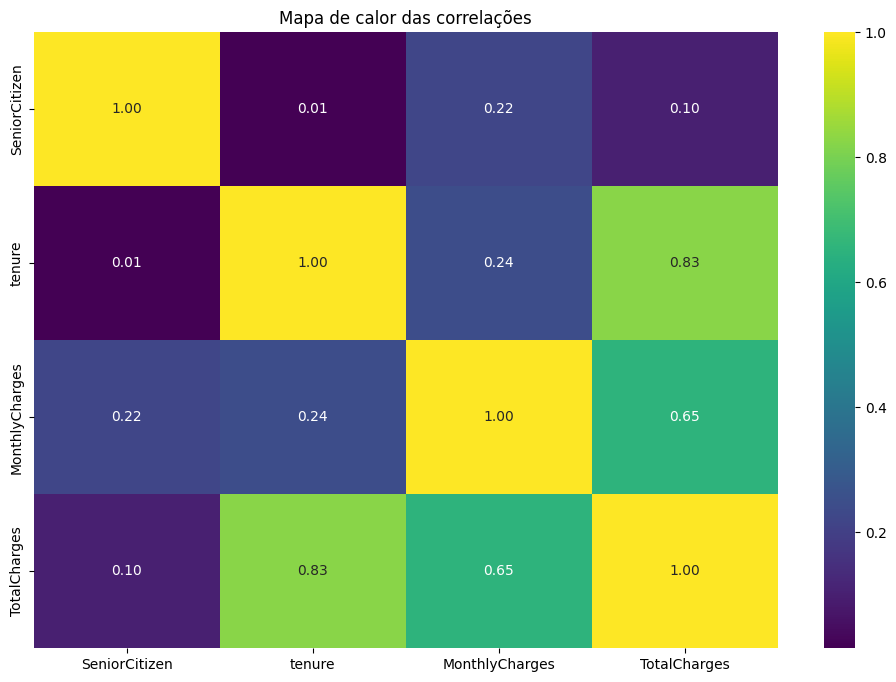

In [135]:
# Importar o matplotlib para ajustar o tamanho da figura
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o mapa de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(tabela.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title("Mapa de calor das correlações")
plt.show()

---
## 5. Aplicação de machine larning 

Nesta etapa, o foco foi construir, avaliar e interpretar modelos de Machine Learning para diagnosticar as causas do cancelamento de clientes (churn).

## 5.1. Implementação e Avaliação do Modelo
O processo iniciou com a preparação dos dados, que foram divididos em conjuntos de treino e teste. O modelo da Árvore de Decisão foi então treinado para aprender os padrões associados ao churn e, em seguida, teve sua acurácia avaliada com os dados de teste para medir sua capacidade de generalização.

In [114]:
# Preparação Final para o Modelo (One-Hot Encoding)

# Criar a 'tabela_modelo' a partir de uma cópia da 'tabela' que já está limpa.
tabela_modelo = tabela.copy()
tabela_modelo = pd.get_dummies(tabela_modelo, drop_first=True)

# Renomear colunas para remover caracteres especiais
tabela_modelo.columns = tabela_modelo.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

print("DataFrame final para o modelo:")
display(tabela_modelo.head())
print(f"\nO DataFrame final tem agora {tabela_modelo.shape[1]} colunas e está pronto para o modelo.")

DataFrame final para o modelo:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Nophoneservice,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_Nointernetservice,StreamingMovies_Yes,Contract_Oneyear,Contract_Twoyear,PaperlessBilling_Yes,PaymentMethod_Creditcardautomatic,PaymentMethod_Electroniccheck,PaymentMethod_Mailedcheck,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True



O DataFrame final tem agora 31 colunas e está pronto para o modelo.


In [115]:
# CONSTRUÇÃO E AVALIAÇÃO DO MODELO

# Separar os dados em Features (X) e Alvo (y)
X = tabela_modelo.drop('Churn_Yes', axis=1)
y = tabela_modelo['Churn_Yes']

# Dividir em dados de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo - APRENDIZADO
modelo_churn = LogisticRegression(max_iter=1000)
modelo_churn.fit(X_train, y_train)

# Fazer predições - APLICAÇÃO DA PREDIÇÃO
predicoes = modelo_churn.predict(X_test)

# Avaliar o modelo - RESULTADO DA APLICAÇÃO
print(f"\nAcurácia do modelo: {accuracy_score(y_test, predicoes) * 100:.2f}%\n")
print("Relatório de Classificação:")
print(classification_report(y_test, predicoes))


Acurácia do modelo: 81.79%

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1564
        True       0.67      0.56      0.61       539

    accuracy                           0.82      2103
   macro avg       0.77      0.73      0.75      2103
weighted avg       0.81      0.82      0.81      2103



C:\Users\anajm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Acurácia da Árvore de Decisão: 72.85%

Matriz de Confusão - Árvore de Decisão:


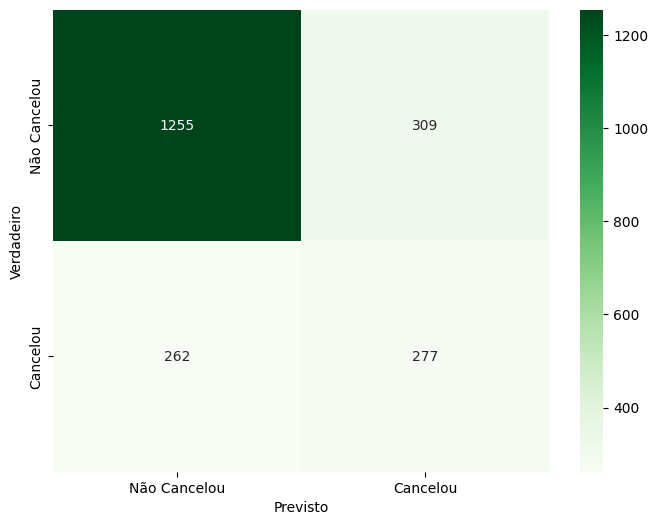


Relatório de Classificação - Árvore de Decisão:
              precision    recall  f1-score   support

Não Cancelou       0.83      0.80      0.81      1564
    Cancelou       0.47      0.51      0.49       539

    accuracy                           0.73      2103
   macro avg       0.65      0.66      0.65      2103
weighted avg       0.74      0.73      0.73      2103



In [ ]:
# ÁRVORE DE DECISÃO

# Criação e treino do modelo de Árvore de Decisão com os mesmos dados de treino que já existem
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)

# Previsões
previsoes_arvore = modelo_arvore.predict(X_test)

# Cálculo e impressão da acurácia
acuracia_arvore = accuracy_score(y_test, previsoes_arvore)
print(f"Acurácia da Árvore de Decisão: {acuracia_arvore:.2%}")

# Matriz de Confusão para a árvore
matriz_confusao_arvore = confusion_matrix(y_test, previsoes_arvore)

print("\nMatriz de Confusão - Árvore de Decisão:")
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_arvore, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Cancelou', 'Cancelou'],
            yticklabels=['Não Cancelou', 'Cancelou'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# 5. Relatório de Classificação completo
print("\nRelatório de Classificação - Árvore de Decisão:")
print(classification_report(y_test, previsoes_arvore, target_names=['Não Cancelou', 'Cancelou']))

## 5.2. Análise dos Fatores de Influência
Após o treinamento, o passo mais importante foi interpretar as decisões do modelo. Para isso, foi gerado um gráfico com os `"Top 10 Fatores de Influência"`, que ranqueou as características dos clientes que o modelo considerou mais relevantes para prever um cancelamento.

C:\Users\anajm\AppData\Local\Temp\ipykernel_12548\2614526866.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




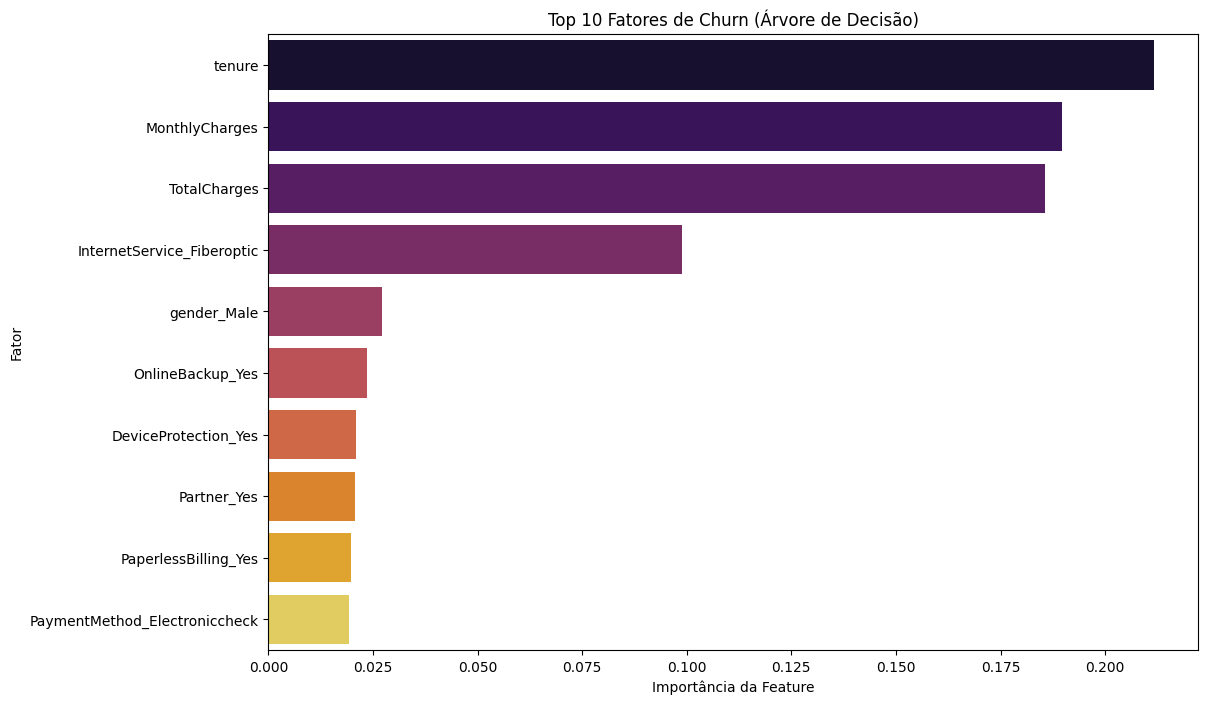

In [ ]:
# GRÁFICO TOP 10 DA ÁRVORE DE DECISÃO

# DataFrame com a importância de cada feature
importancia_arvore_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': modelo_arvore.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# As 10 mais importantes e reinicia o índice
top_10_arvore = importancia_arvore_df.head(10).reset_index(drop=True)

# Plotar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Feature', data=top_10_arvore, palette='inferno')
plt.title('Top 10 Fatores de Churn (Árvore de Decisão)')
plt.xlabel('Importância da Feature')
plt.ylabel('Fator')
plt.show()

## 5.3. Validação e Construção do Perfil de Risco
Para validar as descobertas do modelo, foi realizada uma série de análises detalhadas sobre as 10 principais features. Cada fator de risco foi investigado individualmente nos dados originais, o que confirmou as hipóteses geradas pelo modelo. A investigação provou, por exemplo, que a esmagadora maioria dos cancelamentos vem de clientes novos (baixo tenure), com contratos mensais e sem serviços de valor agregado

Os outros features também foram analisados, com o objetivo de que a empresa analise esses dados e veja a campanha/medida mais favorável para ela e para os resultados que buscam.

In [ ]:
# CÓDIGO DE ANÁLISE PARA tenure

# Criar as faixas de tempo de contrato (tenure)
# Faixas: 0-12 meses (Novos), 13-48 (Intermediários), 49+ (Antigos)
bins = [0, 12, 48, 72]
labels = ['0-12 Meses (Cliente Novo)', '13-48 Meses (Cliente Intermediário)', '49-72 Meses (Cliente Antigo)']
tabela['TenureRange'] = pd.cut(tabela['tenure'], bins=bins, labels=labels, right=True)

# Filtrar apenas pelos clientes que cancelaram (Churn = 'Yes')
clientes_churn = tabela[tabela['Churn'] == 'Yes']

# Contar quantos clientes de cada faixa de tempo cancelaram
print("De todos os clientes que cancelaram, a distribuição por tempo de contrato é:")
churn_por_faixa = clientes_churn['TenureRange'].value_counts(normalize=True).mul(100).round(2)

# Resultado
print(churn_por_faixa.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por tempo de contrato é:
TenureRange
0-12 Meses (Cliente Novo)               55.2 %
13-48 Meses (Cliente Intermediário)    33.33 %
49-72 Meses (Cliente Antigo)           11.47 %
Name: proportion, dtype: object


In [ ]:
# CÓDIGO DE ANÁLISE PARA Cobrança Total (TotalCharges)

# Criar faixas de cobrança total
bins_total = [0, 1000, 4000, 9000]
labels_total = ['Até $1000 (Baixo)', '$1001 - $4000 (Médio)', 'Acima de $4000 (Alto)']
tabela['TotalChargesRange'] = pd.cut(tabela['TotalCharges'], bins=bins_total, labels=labels_total, right=True)

# Contar o churn por faixa de cobrança total
churn_por_faixa_total = tabela[tabela['Churn'] == 'Yes']['TotalChargesRange'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição por cobrança total é:")
print(churn_por_faixa_total.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por cobrança total é:
TotalChargesRange
Até $1000 (Baixo)        56.97 %
$1001 - $4000 (Médio)    29.94 %
Acima de $4000 (Alto)    13.09 %
Name: proportion, dtype: object


In [137]:
# CÓDIGO DE ANÁLISE PARA Cobrança Mensal (MonthlyCharges)

# Criar faixas de cobrança mensal
bins_monthly = [0, 40, 80, 120]
labels_monthly = ['Até $40 (Baixa)', '$41 - $80 (Média)', 'Acima de $80 (Alta)']
tabela['MonthlyChargesRange'] = pd.cut(tabela['MonthlyCharges'], bins=bins_monthly, labels=labels_monthly, right=True)

# Contar o churn por faixa de cobrança mensal
churn_por_faixa_mensal = tabela[tabela['Churn'] == 'Yes']['MonthlyChargesRange'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição por cobrança mensal é:")
print(churn_por_faixa_mensal.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por cobrança mensal é:
MonthlyChargesRange
Acima de $80 (Alta)    48.79 %
$41 - $80 (Média)       39.9 %
Até $40 (Baixa)        11.31 %
Name: proportion, dtype: object


In [138]:
# CÓDIGO DE ANÁLISE PARA Tipo de Contrato (Contract)

churn_por_contrato = tabela[tabela['Churn'] == 'Yes']['Contract'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição por tipo de contrato é:")
print(churn_por_contrato.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por tipo de contrato é:
Contract
Month-to-month    88.48 %
One year           8.94 %
Two year           2.58 %
Name: proportion, dtype: object


In [139]:
# CÓDIGO DE ANÁLISE PARA Serviço de Internet (InternetService)

churn_por_internet = tabela[tabela['Churn'] == 'Yes']['InternetService'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição por tipo de internet é:")
print(churn_por_internet.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por tipo de internet é:
InternetService
Fiber optic    69.52 %
DSL            24.61 %
No              5.87 %
Name: proportion, dtype: object


In [140]:
# CÓDIGO DE ANÁLISE PARA Método de Pagamento (PaymentMethod)

churn_por_pagamento = tabela[tabela['Churn'] == 'Yes']['PaymentMethod'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição por método de pagamento é:")
print(churn_por_pagamento.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por método de pagamento é:
PaymentMethod
Electronic check             57.35 %
Mailed check                 16.26 %
Bank transfer (automatic)    13.89 %
Credit card (automatic)      12.49 %
Name: proportion, dtype: object


In [141]:
# # CÓDIGO DE ANÁLISE PARA Gênero (gender)

churn_por_genero = tabela[tabela['Churn'] == 'Yes']['gender'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição por gênero é:")
print(churn_por_genero.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por gênero é:
gender
Female    50.3 %
Male      49.7 %
Name: proportion, dtype: object


In [142]:
# CÓDIGO DE ANÁLISE PARA Fatura Online (PaperlessBilling)

churn_por_fatura = tabela[tabela['Churn'] == 'Yes']['PaperlessBilling'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição por tipo de fatura é:")
print(churn_por_fatura.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por tipo de fatura é:
PaperlessBilling
Yes    74.91 %
No     25.09 %
Name: proportion, dtype: object


In [143]:
# CÓDIGO DE ANÁLISE PARA Segurança Online (OnlineSecurity)

churn_por_seguranca = tabela[tabela['Churn'] == 'Yes']['OnlineSecurity'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição do serviço de Segurança Online é:")
print(churn_por_seguranca.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição do serviço de Segurança Online é:
OnlineSecurity
No                     78.24 %
Yes                    15.89 %
No internet service     5.87 %
Name: proportion, dtype: object


In [144]:
# CÓDIGO DE ANÁLISE PARA Parceiro/a (Partner)

churn_por_parceiro = tabela[tabela['Churn'] == 'Yes']['Partner'].value_counts(normalize=True).mul(100).round(2)
print("De todos os clientes que cancelaram, a distribuição por relacionamento é:")
print(churn_por_parceiro.astype(str) + ' %')

De todos os clientes que cancelaram, a distribuição por relacionamento é:
Partner
No     63.97 %
Yes    36.03 %
Name: proportion, dtype: object


---
Um exemplo da aplicação desses códigos seria para conseguir a informação abaixo, descobrindo a relação com outras classes também e tomando medidas cabíveis para melhora do serviço oferecido.

In [ ]:
# Filtra pelos clientes com Fibra Ótica que cancelaram
clientes_fibra_churn = tabela[
    (tabela['InternetService'] == 'Fiber optic') &
    (tabela['Churn'] == 'Yes')
]

print(f"Total de clientes de Fibra Ótica que cancelaram: {len(clientes_fibra_churn)}")
print("-" * 50) # Apenas uma linha para separar

# Verifica a distribuição do Suporte Técnico para esse grupo
print("Dentro do grupo que tem Fibra e Cancelou, o status do Suporte Técnico foi:")
print(clientes_fibra_churn['TechSupport'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Total de clientes de Fibra Ótica que cancelaram: 1291
--------------------------------------------------
Dentro do grupo que tem Fibra e Cancelou, o status do Suporte Técnico foi:
TechSupport
No     84.82%
Yes    15.18%
Name: proportion, dtype: object


---
Aqui, chegamos ao fim do código. Este projeto demonstrou que, através da análise de dados, é possível identificar com clareza as principais causas do cancelamento de clientes. A conclusão central é que o tempo de contrato (tenure) e o tipo de plano (Month-to-Month) são os fatores mais críticos, permitindo que a empresa foque suas ações de retenção em clientes novos e sem fidelidade.